In [ ]:
# recycle the original dataset for n batches and add noise

In [ ]:
# 10% noise

In [7]:
import pandas as pd
import numpy as np

# Load the original dataset
dataset = pd.read_csv('../dataset/aryl-scope-ligand.csv')

# Define the number of times you want to recycle the dataset
n_batches = 5

# Prepare an empty DataFrame to hold the augmented data
augmented_dataset = pd.DataFrame()

for batch in range(1, n_batches + 1):
    batched_data = dataset.copy()
    
    # Append batch number to each categorical column
    batched_data['electrophile_id'] = batched_data['electrophile_id'] + '_batch' + str(batch)
    
    # Append the batched data to the augmented dataset
    augmented_dataset = pd.concat([augmented_dataset, batched_data], ignore_index=True)

# Shuffle the rows
augmented_dataset = augmented_dataset.sample(frac=1).reset_index(drop=True)

# Reassign 'Unnamed: 0' column with new indices starting from 0
augmented_dataset['Unnamed: 0'] = augmented_dataset.index

# Calculate the mean and standard deviation for noise generation
mu = 0
sigma = 0.1 * augmented_dataset['yield'].mean()

# Create Gaussian noise for the expanded dataset
noise = np.random.normal(mu, sigma, augmented_dataset['yield'].shape)

# Add the noise to the 'yield' column
augmented_dataset['yield'] = augmented_dataset['yield'] + noise

# Save the modified dataset to a new CSV file
augmented_dataset.to_csv('../dataset/noisy_recycled_arylation.csv', index=False)

In [ ]:
# Compare five representative algorithms

In [20]:
%%time
%%capture
import pandas as pd
from algos_regret import EpsilonGreedy, UCB1, UCB1Tuned,ThompsonSamplingGaussianFixedVarSquared, BayesUCBGaussian
from chem_arms import simulate_propose_and_update
import utils
from utils import make_dir

ground_truth = pd.read_csv('../dataset/noisy_recycled_arylation.csv')
ground_truth['yield'] = ground_truth['yield'].apply(utils.scaler)
ground_truth = ground_truth[['ligand_name', 'electrophile_id', 'nucleophile_id', 'yield']]

ligands = ground_truth['ligand_name'].unique()
elecs = ground_truth['electrophile_id'].unique()
nucs = ground_truth['nucleophile_id'].unique()

scope_dict = {'ligand_name': ligands,
              'electrophile_id': elecs,
              'nucleophile_id': nucs}
arms_dict = {'ligand_name': ligands}
n_arms = len(ligands)
algos = [EpsilonGreedy(n_arms, 0.1),
         UCB1(n_arms),
         UCB1Tuned(n_arms),
         ThompsonSamplingGaussianFixedVarSquared(n_arms),
         BayesUCBGaussian(n_arms, assumed_sd=0.25, c=2),]

wkdir = '../noisy_dataset_logs/arylation/'
num_sims = 300
num_round = 450
num_exp = 1

dirs = []  # for the plotting later

for algo in algos:
    dir_name = f'{wkdir}{algo.__str__()}-{num_sims}s-{num_round}r-{num_exp}e/'
    dirs.append(dir_name)
    make_dir(dir_name)

    simulate_propose_and_update(scope_dict, arms_dict, ground_truth, algo,
                                dir=dir_name,
                                num_sims=num_sims,
                                num_round=num_round,
                                num_exp=num_exp,
                                predict=False)

CPU times: user 34min 23s, sys: 1min 3s, total: 35min 26s
Wall time: 35min 25s


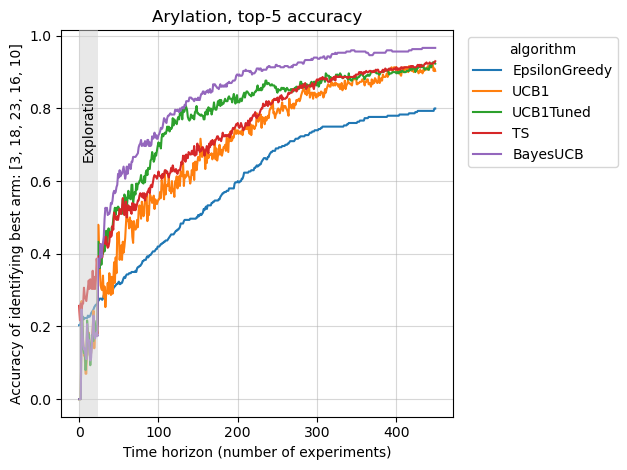

In [22]:
from chem_analyze import plot_accuracy_best_arm
import pickle

fn_list = [f'{d}log.csv' for d in dirs]
legend_list = ['EpsilonGreedy','UCB1', 'UCB1Tuned', 'TS', 'BayesUCB']

# since algorithms use indexes to differentiate arms, and we use ligand names,
# we need to do a search here with a saved arms_dict during optimization
with open(f'{dirs[0]}/arms.pkl', 'rb') as f:
    arms_dict = pickle.load(f)
reverse_arms_dict = {v: k for k, v in arms_dict.items()}

# now we can find indexes for the top-5 ligands that we want.
top5 = ['Cy-BippyPhos', 'Et-PhenCar-Phos', 'tBPh-CPhos', 'CgMe-PPh', 'JackiePhos']
ligands = [(l,) for l in top5]  # arms_dict takes tuples
indexes = [reverse_arms_dict[l] for l in ligands]

plot_accuracy_best_arm(best_arm_indexes=indexes,
                       fn_list=fn_list,
                       legend_list=legend_list,
                       shade_first_rounds=24,
                       title=f'Arylation, top-5 accuracy',
                       legend_title='algorithm',
                       long_legend=True)

In [ ]:
# 50% noise

In [13]:
import pandas as pd
import numpy as np

# Load the original dataset
dataset = pd.read_csv('../dataset/aryl-scope-ligand.csv')

# Define the number of times you want to recycle the dataset
n_batches = 5

# Prepare an empty DataFrame to hold the augmented data
augmented_dataset = pd.DataFrame()

for batch in range(1, n_batches + 1):
    batched_data = dataset.copy()
    
    # Append batch number to each categorical column
    batched_data['electrophile_id'] = batched_data['electrophile_id'] + '_batch' + str(batch)
    
    # Append the batched data to the augmented dataset
    augmented_dataset = pd.concat([augmented_dataset, batched_data], ignore_index=True)

# Shuffle the rows
augmented_dataset = augmented_dataset.sample(frac=1).reset_index(drop=True)

# Reassign 'Unnamed: 0' column with new indices starting from 0
augmented_dataset['Unnamed: 0'] = augmented_dataset.index

# Calculate the mean and standard deviation for noise generation
mu = 0
sigma = 0.5 * augmented_dataset['yield'].mean()

# Create Gaussian noise for the expanded dataset
noise = np.random.normal(mu, sigma, augmented_dataset['yield'].shape)

# Add the noise to the 'yield' column
augmented_dataset['yield'] = augmented_dataset['yield'] + noise

# Save the modified dataset to a new CSV file
augmented_dataset.to_csv('../dataset/noisy_recycled_arylation2.csv', index=False)

In [15]:
%%time
%%capture
import pandas as pd
from algos_regret import EpsilonGreedy, UCB1, UCB1Tuned,ThompsonSamplingGaussianFixedVarSquared, BayesUCBGaussian
from chem_arms import simulate_propose_and_update
import utils
from utils import make_dir

ground_truth = pd.read_csv('../dataset/noisy_recycled_arylation2.csv')
ground_truth['yield'] = ground_truth['yield'].apply(utils.scaler)
ground_truth = ground_truth[['ligand_name', 'electrophile_id', 'nucleophile_id', 'yield']]

ligands = ground_truth['ligand_name'].unique()
elecs = ground_truth['electrophile_id'].unique()
nucs = ground_truth['nucleophile_id'].unique()

scope_dict = {'ligand_name': ligands,
              'electrophile_id': elecs,
              'nucleophile_id': nucs}
arms_dict = {'ligand_name': ligands}
n_arms = len(ligands)
algos = [EpsilonGreedy(n_arms, 0.1),
         UCB1(n_arms),
         UCB1Tuned(n_arms),
         ThompsonSamplingGaussianFixedVarSquared(n_arms),
         BayesUCBGaussian(n_arms, assumed_sd=0.25, c=2),]

wkdir = '../noisy_dataset_logs/arylation2/'
num_sims = 300
num_round = 450
num_exp = 1

dirs = []  # for the plotting later

for algo in algos:
    dir_name = f'{wkdir}{algo.__str__()}-{num_sims}s-{num_round}r-{num_exp}e/'
    dirs.append(dir_name)
    make_dir(dir_name)

    simulate_propose_and_update(scope_dict, arms_dict, ground_truth, algo,
                                dir=dir_name,
                                num_sims=num_sims,
                                num_round=num_round,
                                num_exp=num_exp,
                                predict=False)

CPU times: user 34min 10s, sys: 1min 3s, total: 35min 14s
Wall time: 35min 12s


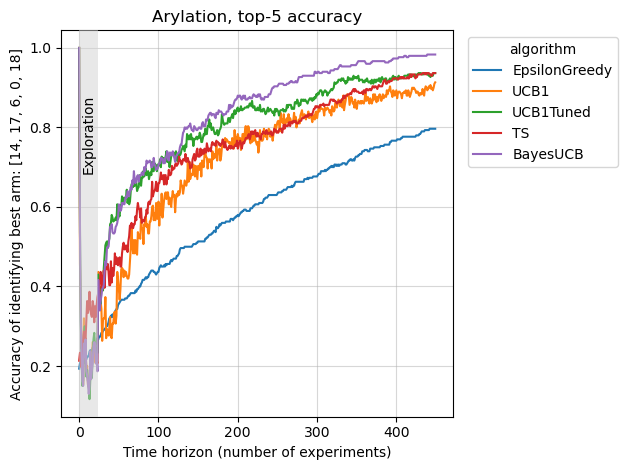

In [18]:
from chem_analyze import plot_accuracy_best_arm
import pickle

fn_list = [f'{d}log.csv' for d in dirs]
legend_list = ['EpsilonGreedy','UCB1', 'UCB1Tuned', 'TS', 'BayesUCB']

# since algorithms use indexes to differentiate arms, and we use ligand names,
# we need to do a search here with a saved arms_dict during optimization
with open(f'{dirs[0]}/arms.pkl', 'rb') as f:
    arms_dict = pickle.load(f)
reverse_arms_dict = {v: k for k, v in arms_dict.items()}

# now we can find indexes for the top-5 ligands that we want.
top5 = ['Cy-BippyPhos', 'Et-PhenCar-Phos', 'tBPh-CPhos', 'CgMe-PPh', 'JackiePhos']
ligands = [(l,) for l in top5]  # arms_dict takes tuples
indexes = [reverse_arms_dict[l] for l in ligands]

plot_accuracy_best_arm(best_arm_indexes=indexes,
                       fn_list=fn_list,
                       legend_list=legend_list,
                       shade_first_rounds=24,
                       title=f'Arylation, top-5 accuracy',
                       legend_title='algorithm',
                       long_legend=True)